In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import datetime

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
def format_xdates(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig

In [4]:
weather = pd.read_csv('Data//london_weather_MODIFIED - london_weather_MODIFIED.csv')
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [5]:
weather['date'][0]

19790101

In [6]:
today_datetime = datetime.datetime.today()
fmt = "%Y%m%d"
today_datetime.strftime(fmt)

'20231103'

In [7]:
weather['date'] = pd.to_datetime(weather['date'], format=fmt)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [8]:
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [9]:
weather = weather.set_index('date')
weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [10]:
weather = weather.loc[(weather.index.year >= 2000), ['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
weather

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


# Imputing missing values

In [11]:
weather.isnull().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [12]:
weather['precipitation'].interpolate(method='linear', inplace=True)
weather['mean_temp'].fillna(weather['mean_temp'].mean(), inplace=True)
weather['min_temp'].fillna(method='ffill', inplace=True)
weather['max_temp'].fillna(method='ffill', inplace=True)
weather['snow_depth'].interpolate(method='linear', inplace=True)
weather

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [13]:
weather.isnull().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2

# What month had the most precipitation between 2000 through 2010?


In [18]:
weather_ts = weather.copy()
weather_ts = weather_ts['2000':'2010']

In [23]:
monthly_precipitation = weather_ts['precipitation'].resample('M').sum()
monthly_precipitation

date
2000-01-31   14.50
2000-02-29   64.80
2000-03-31   13.90
2000-04-30   82.50
2000-05-31   78.00
              ... 
2010-08-31   92.40
2010-09-30   44.60
2010-10-31   63.10
2010-11-30   32.00
2010-12-31   21.30
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [24]:
max_date = monthly_precipitation.idxmax()
max_value = monthly_precipitation[max_date]

<Axes: xlabel='date'>

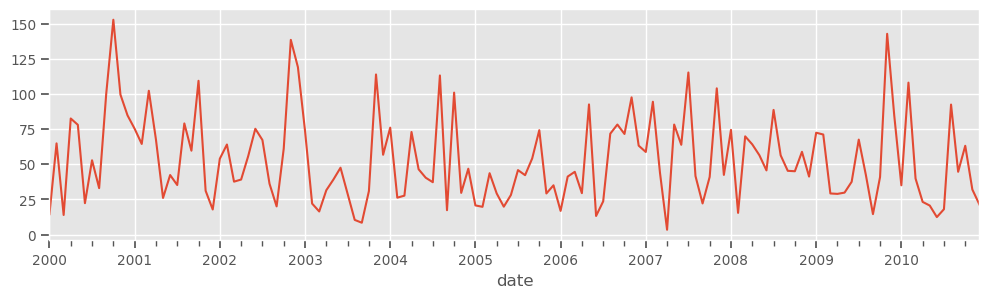

In [25]:
fig, ax = plt.subplots(figsize=(12,3))
monthly_precipitation.plot(ax=ax,)

In [33]:
# Create a year locator
loc_major_yr = mdates.YearLocator()

# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")

# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])

# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

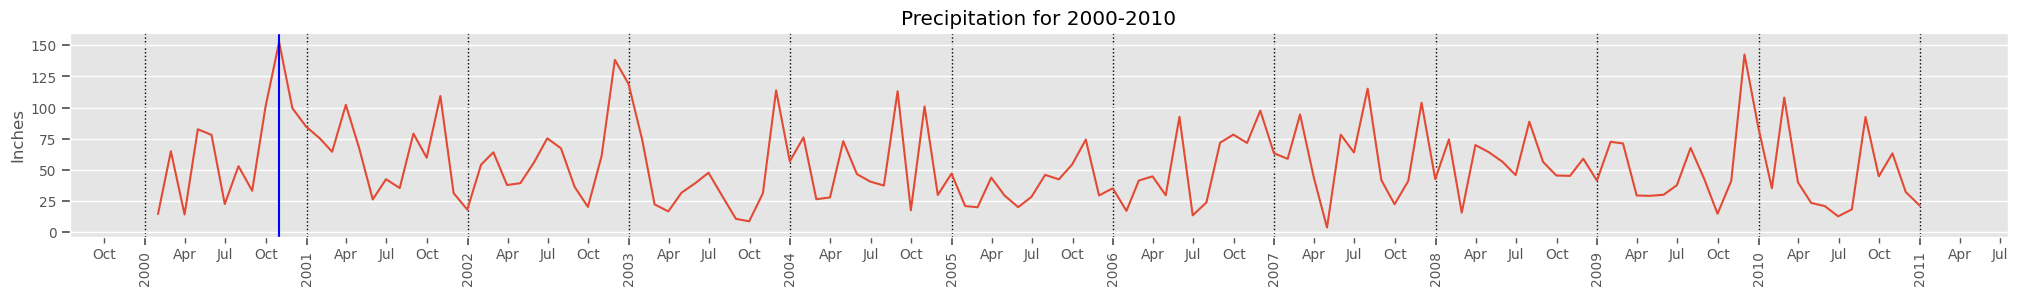

In [36]:
## Create the figure and axis
fig, ax = plt.subplots(figsize=(25,3))
ax.plot(monthly_precipitation)
## Format the xticks
format_xdates(ax)
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')
# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)

# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

# Finding max precipitation value
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()

## Plot the data
fig = ax.get_figure()
plt.axvline(x=max_precipitation_date, color='b')
fig.autofmt_xdate(which='major', rotation=90,ha='center')



In [25]:
weather_ts.idxmax()

Timestamp('2014-01-31 00:00:00', freq='M')

- the blue line means that the date with the highest precipitation is on October in 2000.

In [37]:
temp_ts = weather.copy()
temp_ts = weather.resample('Y').mean()['mean_temp']
temp_ts

date
2000-12-31   11.56
2001-12-31   11.34
2002-12-31   12.00
2003-12-31   12.22
2004-12-31   11.87
2005-12-31   11.88
2006-12-31   12.36
2007-12-31   12.05
2008-12-31   11.21
2009-12-31   11.73
2010-12-31   10.72
2011-12-31   12.45
2012-12-31   11.36
2013-12-31   11.24
2014-12-31   12.59
2015-12-31   12.08
2016-12-31   11.90
2017-12-31   12.22
2018-12-31   12.41
2019-12-31   12.21
2020-12-31   12.64
Freq: A-DEC, Name: mean_temp, dtype: float64

In [39]:
min_date = temp_ts.idxmin()
min_value = temp_ts[min_date]

In [40]:
loc_5year = mdates.YearLocator(base=5)
fmt_year = mdates.DateFormatter("%Y")
loc_minor_1year = mdates.YearLocator()
fmt_minor_1year = mdates.DateFormatter("%Y")

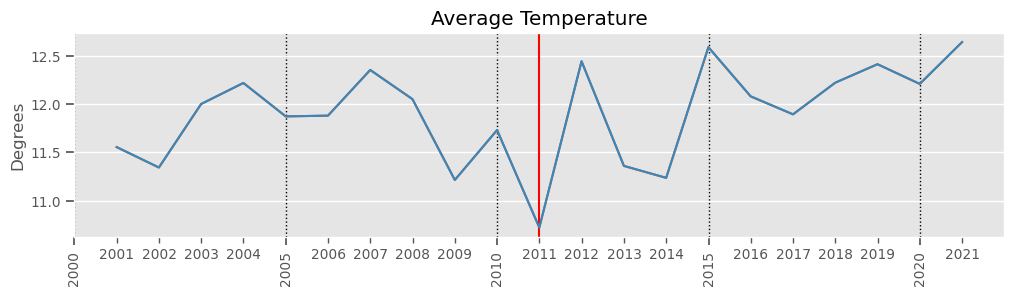

In [41]:
## Create the figure and axis
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(temp_ts)


## Format the xticks
format_xdates(ax)
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')
# major and minor formatter
ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_year)

ax.xaxis.set_minor_locator(loc_minor_1year)
ax.xaxis.set_minor_formatter(fmt_minor_1year)

min_precipitation_date = temp_ts.idxmin()
min_precipitation_value = temp_ts.min()

ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

plt.axvline(x=min_precipitation_date, color='r')

## Plot the data
ax.plot(temp_ts);
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

- the red line indicates that the lowest temperature is in 2011